# Dataset Fakeddit com Dados Multimodais

O Fakeddit é um conjunto de dados que oferece informações multimodais, combinando texto e imagem, para a detecção de fake news. A versão mais recente (v2.0) pode ser encontrada no repositório oficial do GitHub, que direciona para uma pasta compartilhada no Google Drive. A partir dessa pasta, baixamos os arquivos necessários para a análise na subpasta _multimodal_only_samples_, contendo amostras específicas para treino, validação e teste.

Estrutura da pasta:
```
multimodal_only_samples 
│ 
├── multimodal_test_public 
├── multimodal_train 
└── multimodal_validate
```

In [51]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns

# Read the TSV file into a DataFrame
file_path = "./multimodal_only_samples/multimodal_test_public.tsv" 
df = pd.read_csv(file_path, sep='\t')


### Descrição das Colunas

- **author**: Autor da postagem ou artigo.
- **clean_title**: Versão "limpa" do título da postagem/artigo, removendo caracteres especiais e ruído.
- **created_utc**: Data e hora de criação no formato Unix timestamp.
- **domain**: Domínio (site) de onde o artigo/postagem foi publicado.
- **hasImage**: Indica se há uma imagem associada à postagem/artigo. Nesta base, todas as amostras são multimodais, portanto, há texto e imagem correspondentes em cada notícia.
- **id**: Identificador único da postagem/artigo.
- **image_url**: URL da imagem associada à postagem/artigo.
- **linked_submission_id**: Identificador de outras postagens relacionadas, se houver.
- **num_comments**: Número de comentários na postagem/artigo.
- **score**: Pontuação ou quantidade de "upvotes" recebidos.
- **subreddit**: Subreddit em que a postagem foi publicada.
- **title**: Título original da postagem/artigo.
- **upvote_ratio**: Proporção de "upvotes" em relação ao total de votos, indicando o quão bem a postagem foi recebida pelos usuários do Reddit.

### Colunas de Rótulo

- **2_way_label**: Classificação binária que indica se a notícia é real (1) ou falsa (0).
  
- **3_way_label**: Classificação ternária com três categorias, correlacionadas com o campo **6_way_label**:
  - 0 - **Verdadeiro**: Conteúdo factual, verificado e de fontes confiáveis.
  - 1 - **Falso**: Conteúdo enganoso ou totalmente falso, agrupando vários tipos de desinformação.
  - 2 - **Sátira/Paródia**: Conteúdo humorístico que pode ser interpretado erroneamente como verdadeiro.

**Mapeamento do 6_way_label para 3_way_label:**
- `6_way_label 0` (Verdadeiro) → `3_way_label 0` (Verdadeiro)
- `6_way_label 1` (Sátira/Paródia) → `3_way_label 2` (Sátira/Paródia)
- `6_way_label 2 a 5` (Demais categorias) → `3_way_label 1` (Falso)

- **6_way_label**: Classificação multicategoria com seis possíveis rótulos:
  - 0 - **Verdadeiro**: Conteúdo totalmente factual.
  - 1 - **Sátira/Paródia**: Conteúdo humorístico, não necessariamente informativo.
  - 2 - **Conteúdo Enganoso**: Mistura fatos com informações enganosas.
  - 3 - **Conteúdo Impostor**: Pretende ser de uma fonte confiável, mas é falso.
  - 4 - **Conexão Falsa**: Títulos e imagens que não correspondem ao conteúdo.
  - 5 - **Conteúdo Manipulado**: Conteúdo genuíno alterado para enganar, como imagens ou vídeos editados.

Esta estrutura detalhada do dataset Fakeddit permite uma abordagem abrangente no treinamento de modelos de detecção de fake news, considerando diferentes nuances e contextos de desinformação.

In [52]:
display(df)

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4
1,NaN,yeah,1.438173e+09,NaN,True,ctk61yw,http://i.imgur.com/JRZT727.jpg,3f0h7o,NaN,2,psbattle_artwork,yeah,NaN,0,2,4
2,chaseoes,pd phoenix car thief gets instructions from yo...,1.560492e+09,abc15.com,True,c0gl7r,https://external-preview.redd.it/1A2_4VwgS8Qd2...,NaN,2.0,16,nottheonion,PD: Phoenix car thief gets instructions from Y...,0.89,1,0,0
3,SFepicure,as trump accuses iran he has one problem his o...,1.560606e+09,nytimes.com,True,c0xdqy,https://external-preview.redd.it/9BKRcgvaobpTo...,NaN,4.0,45,neutralnews,"As Trump Accuses Iran, He Has One Problem: His...",0.78,1,0,0
4,fragments_from_Work,believers hezbollah,1.515139e+09,i.imgur.com,True,7o9rmx,https://external-preview.redd.it/rbwXHncnjVh51...,NaN,40.0,285,propagandaposters,"""Believers"" - Hezbollah 2011",0.95,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,lazarus30d,bicycle taxi drivers of new delhi,1.352463e+09,flickr.com,True,12wreq,https://external-preview.redd.it/mWhXZymnupI3a...,NaN,0.0,4,pic,Bicycle taxi drivers of New Delhi,0.64,1,0,0
59315,Sewblon,trump blows up gops formula for winning house ...,1.533888e+09,politico.com,True,9650zw,https://external-preview.redd.it/1uLpjM1bd_vA-...,NaN,1.0,2,neutralnews,Trump blows up GOP's formula for winning House...,0.58,1,0,0
59316,Lifewillbelife,napoleon returns from his exile on the island ...,1.521720e+09,i.redd.it,True,86ax7x,https://preview.redd.it/fuzkuzxt0bn01.png?widt...,NaN,0.0,45,fakehistoryporn,Napoleon returns from his exile on the island ...,0.98,0,2,2
59317,LordCamembert,deep down he always wanted to be a ballet dancer,1.366567e+09,NaN,True,c9jq15h,http://i.imgur.com/otCWbOt.jpg,1cssa3,NaN,141,psbattle_artwork,Deep down he always wanted to be a ballet dancer,NaN,0,2,4


## Dados de Teste (_multimodal_test_public.tsv_)

O arquivo de teste do dataset Fakeddit contém:

- **564.000 itens**: Cada item representa uma postagem ou artigo, combinando texto e imagem.
- **16 colunas**: Incluindo informações textuais, visuais e rótulos de classificação.

Esses dados serão utilizados para validar a eficácia do modelo na detecção de fake news.

## Limpeza e Pré-processamento

Nesta etapa, realizamos a limpeza e o pré-processamento dos dados para garantir que a base de dados esteja pronta para análise e modelagem. A seguir, detalhamos cada uma das ações realizadas:

### 1. Conversão de Data e Hora
Convertemos a coluna `created_utc` de um formato Unix timestamp para um formato de data legível (`datetime`). Isso facilita a manipulação de dados temporais e análises que envolvem datas.

Isso foi feito numa nova variável (```df_new```) para garantir a consistência do dataset original.

### 2. Extração de Ano e Mês
Criamos novas colunas `year` e `month` a partir da coluna `created_utc`, o que permite análises sazonais e ao longo do tempo. As novas colunas foram inseridas logo após a coluna `created_utc` para manter a organização.

In [53]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

df_new = df.copy()

df_new['year'] = df_new['created_utc'].dt.year
df_new['month'] = df_new['created_utc'].dt.month

created_utc_index = df_new.columns.get_loc('created_utc')  

df_new.insert(created_utc_index + 1, 'year', df_new.pop('year'))
df_new.insert(created_utc_index + 2, 'month', df_new.pop('month'))

display(df_new)

,author,clean_title,created_utc,year,month,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,trustbytrust,stargazer,2015-02-28 15:51:00,2015,2,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4
1,NaN,yeah,2015-07-29 12:29:55,2015,7,NaN,True,ctk61yw,http://i.imgur.com/JRZT727.jpg,3f0h7o,NaN,2,psbattle_artwork,yeah,NaN,0,2,4
2,chaseoes,pd phoenix car thief gets instructions from yo...,2019-06-14 05:58:56,2019,6,abc15.com,True,c0gl7r,https://external-preview.redd.it/1A2_4VwgS8Qd2...,NaN,2.0,16,nottheonion,PD: Phoenix car thief gets instructions from Y...,0.89,1,0,0
3,SFepicure,as trump accuses iran he has one problem his o...,2019-06-15 13:38:48,2019,6,nytimes.com,True,c0xdqy,https://external-preview.redd.it/9BKRcgvaobpTo...,NaN,4.0,45,neutralnews,"As Trump Accuses Iran, He Has One Problem: His...",0.78,1,0,0
4,fragments_from_Work,believers hezbollah,2018-01-05 07:53:31,2018,1,i.imgur.com,True,7o9rmx,https://external-preview.redd.it/rbwXHncnjVh51...,NaN,40.0,285,propagandaposters,"""Believers"" - Hezbollah 2011",0.95,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,lazarus30d,bicycle taxi drivers of new delhi,2012-11-09 12:10:52,2012,11,flickr.com,True,12wreq,https://external-preview.redd.it/mWhXZymnupI3a...,NaN,0.0,4,pic,Bicycle taxi drivers of New Delhi,0.64,1,0,0
59315,Sewblon,trump blows up gops formula for winning house ...,2018-08-10 08:00:54,2018,8,politico.com,True,9650zw,https://external-preview.redd.it/1uLpjM1bd_vA-...,NaN,1.0,2,neutralnews,Trump blows up GOP's formula for winning House...,0.58,1,0,0
59316,Lifewillbelife,napoleon returns from his exile on the island ...,2018-03-22 11:57:37,2018,3,i.redd.it,True,86ax7x,https://preview.redd.it/fuzkuzxt0bn01.png?widt...,NaN,0.0,45,fakehistoryporn,Napoleon returns from his exile on the island ...,0.98,0,2,2
59317,LordCamembert,deep down he always wanted to be a ballet dancer,2013-04-21 17:55:04,2013,4,NaN,True,c9jq15h,http://i.imgur.com/otCWbOt.jpg,1cssa3,NaN,141,psbattle_artwork,Deep down he always wanted to be a ballet dancer,NaN,0,2,4


### 3. Remoção de Colunas Desnecessárias
Removemos a coluna `hasImage`, pois todas as amostras são multimodais e essa informação não acrescenta valor à análise.

In [54]:
df_new = df_new.drop('hasImage', axis=1)
display(df_new)

,author,clean_title,created_utc,year,month,domain,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,trustbytrust,stargazer,2015-02-28 15:51:00,2015,2,NaN,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4
1,NaN,yeah,2015-07-29 12:29:55,2015,7,NaN,ctk61yw,http://i.imgur.com/JRZT727.jpg,3f0h7o,NaN,2,psbattle_artwork,yeah,NaN,0,2,4
2,chaseoes,pd phoenix car thief gets instructions from yo...,2019-06-14 05:58:56,2019,6,abc15.com,c0gl7r,https://external-preview.redd.it/1A2_4VwgS8Qd2...,NaN,2.0,16,nottheonion,PD: Phoenix car thief gets instructions from Y...,0.89,1,0,0
3,SFepicure,as trump accuses iran he has one problem his o...,2019-06-15 13:38:48,2019,6,nytimes.com,c0xdqy,https://external-preview.redd.it/9BKRcgvaobpTo...,NaN,4.0,45,neutralnews,"As Trump Accuses Iran, He Has One Problem: His...",0.78,1,0,0
4,fragments_from_Work,believers hezbollah,2018-01-05 07:53:31,2018,1,i.imgur.com,7o9rmx,https://external-preview.redd.it/rbwXHncnjVh51...,NaN,40.0,285,propagandaposters,"""Believers"" - Hezbollah 2011",0.95,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,lazarus30d,bicycle taxi drivers of new delhi,2012-11-09 12:10:52,2012,11,flickr.com,12wreq,https://external-preview.redd.it/mWhXZymnupI3a...,NaN,0.0,4,pic,Bicycle taxi drivers of New Delhi,0.64,1,0,0
59315,Sewblon,trump blows up gops formula for winning house ...,2018-08-10 08:00:54,2018,8,politico.com,9650zw,https://external-preview.redd.it/1uLpjM1bd_vA-...,NaN,1.0,2,neutralnews,Trump blows up GOP's formula for winning House...,0.58,1,0,0
59316,Lifewillbelife,napoleon returns from his exile on the island ...,2018-03-22 11:57:37,2018,3,i.redd.it,86ax7x,https://preview.redd.it/fuzkuzxt0bn01.png?widt...,NaN,0.0,45,fakehistoryporn,Napoleon returns from his exile on the island ...,0.98,0,2,2
59317,LordCamembert,deep down he always wanted to be a ballet dancer,2013-04-21 17:55:04,2013,4,NaN,c9jq15h,http://i.imgur.com/otCWbOt.jpg,1cssa3,NaN,141,psbattle_artwork,Deep down he always wanted to be a ballet dancer,NaN,0,2,4


### 4. Análise da Distribuição de Rótulos
Contamos a frequência de cada categoria na coluna `6_way_label` e criamos um gráfico de barras para visualizar a distribuição dessas categorias.

Fizemos o mesmo processo para a coluna `2_way_label` a fim de entender a distribuição das classes para a classificação binária.

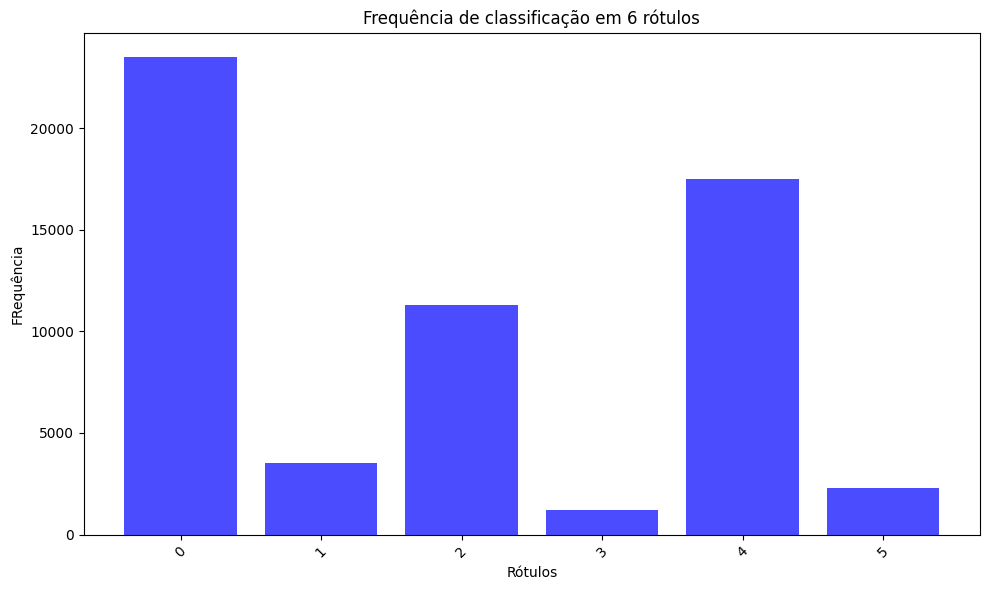

In [55]:
label_counts = df_new['6_way_label'].value_counts() 

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='blue', alpha=0.7)
plt.xlabel('Rótulos')
plt.ylabel('FRequência')
plt.title('Frequência de classificação em 6 rótulos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

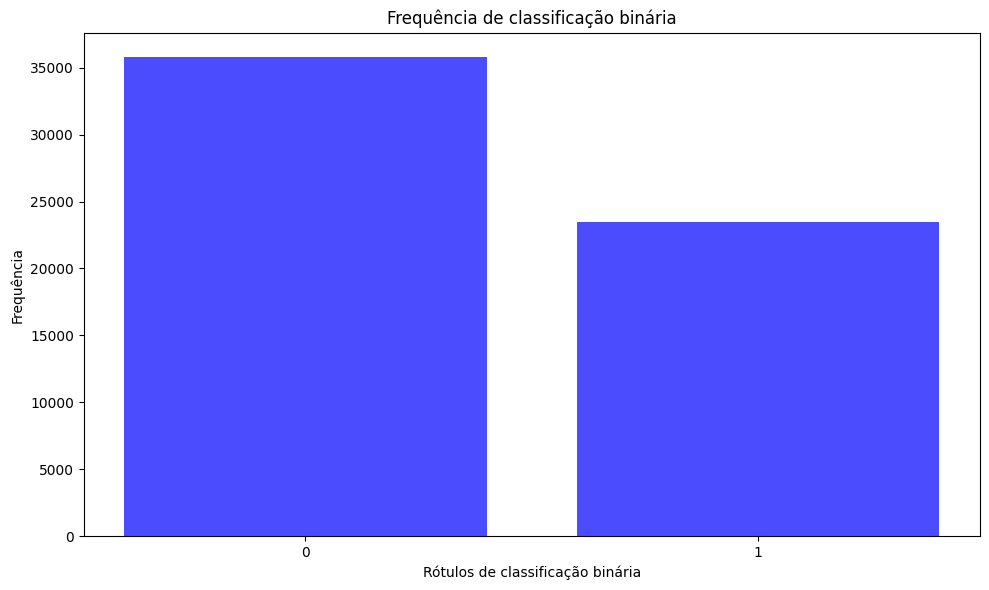

In [56]:
label_counts_binary = df_new['2_way_label'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(label_counts_binary.index.astype(str), label_counts_binary.values, color='blue', alpha=0.7)
plt.xlabel('Rótulos de classificação binária')
plt.ylabel('Frequência')
plt.title('Frequência de classificação binária')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()


### Impacto do Desbalanceamento de Rótulos

Ao analisar os gráficos de distribuição dos rótulos, percebemos que os dados não estão bem distribuídos, tanto na classificação binária (`2_way_label`) quanto na classificação em seis rótulos (`6_way_label`). Isso indica um desbalanceamento significativo entre as classes, onde algumas aparecem com muito mais frequência do que outras.

Esse desbalanceamento pode impactar negativamente o desempenho do modelo de aprendizagem, pois ele pode acabar "aprendendo" a prever as classes majoritárias com maior precisão, enquanto negligencia as classes minoritárias. Em um cenário prático, isso pode levar a um modelo que tem uma precisão alta nas classes mais comuns, mas que falha em detectar corretamente as classes menos representadas.

Para mitigar esse problema, será necessário aplicar técnicas de balanceamento de dados, como:

- **Subamostragem**: Reduzir o número de instâncias das classes majoritárias.
- **Aplicação de técnicas de pesos**: Atribuir pesos maiores para as classes minoritárias durante o treinamento do modelo, de forma que erros nessas classes sejam mais penalizados.

A aplicação dessas técnicas será fundamental para melhorar o desempenho e a capacidade do modelo de lidar com a classificação de todas as classes de forma equilibrada.

### 5. Análise dos Autores e Subreddits
Realizamos uma contagem das ocorrências de cada autor e subreddit para identificar os mais recorrentes na base de dados. Adicionaremos um gráfico de barras para visualizar os autores mais frequentes de maneira clara e visual.

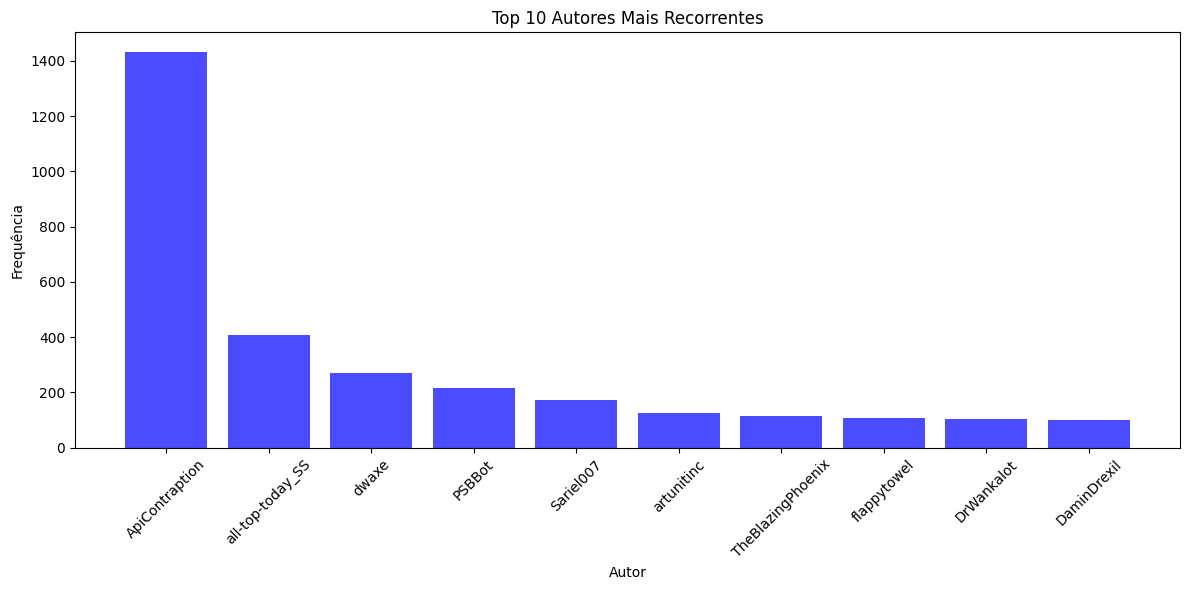

In [57]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_authors.index, top_authors.values, color='blue', alpha=0.7)
plt.xlabel('Autor')
plt.ylabel('Frequência')
plt.title('Top 10 Autores Mais Recorrentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

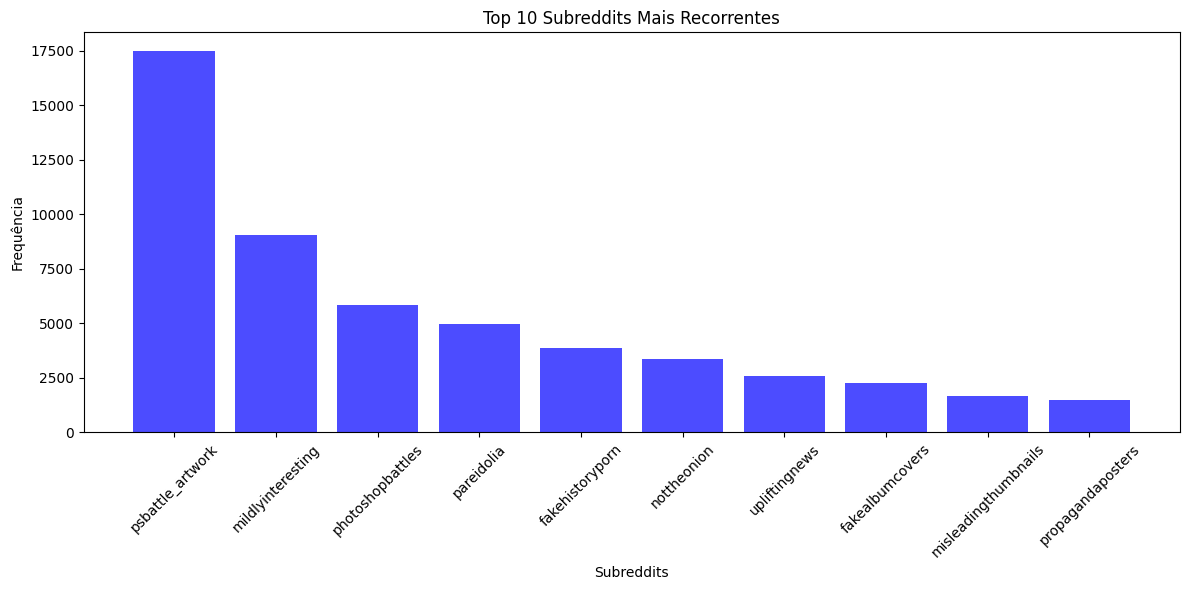

In [58]:
top_subreddit = df_new['subreddit'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_subreddit.index, top_subreddit.values, color='blue', alpha=0.7)
plt.xlabel('Subreddits')
plt.ylabel('Frequência')
plt.title('Top 10 Subreddits Mais Recorrentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Análise Temporal
Geramos gráficos de barras para verificar a quantidade de postagens por ano e por mês, permitindo identificar padrões temporais no conjunto de dados.

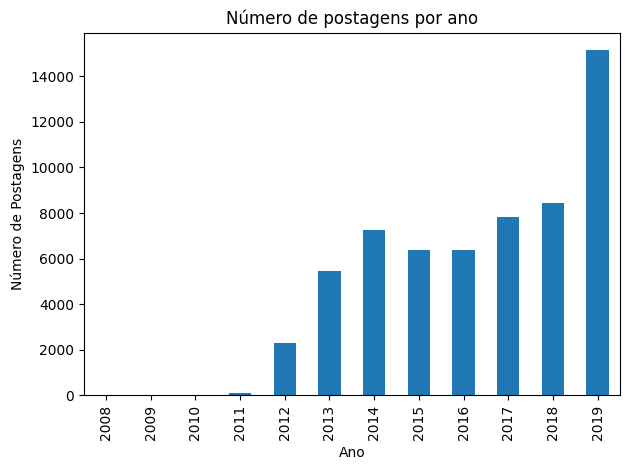

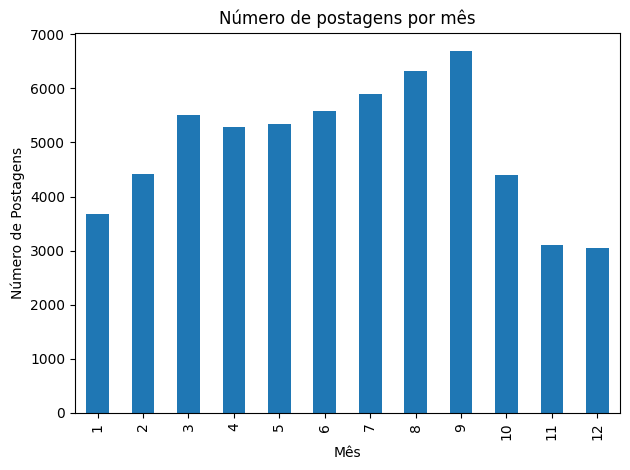

In [59]:
df_new.groupby('year')['id'].count().plot(kind='bar', title='Número de postagens por ano')
plt.xlabel('Ano')
plt.ylabel('Número de Postagens')
plt.tight_layout()
plt.show()

df_new.groupby('month')['id'].count().plot(kind='bar', title='Número de postagens por mês')
plt.xlabel('Mês')
plt.ylabel('Número de Postagens')
plt.tight_layout()
plt.show()

### 7. Análise dos títulos das postagens 

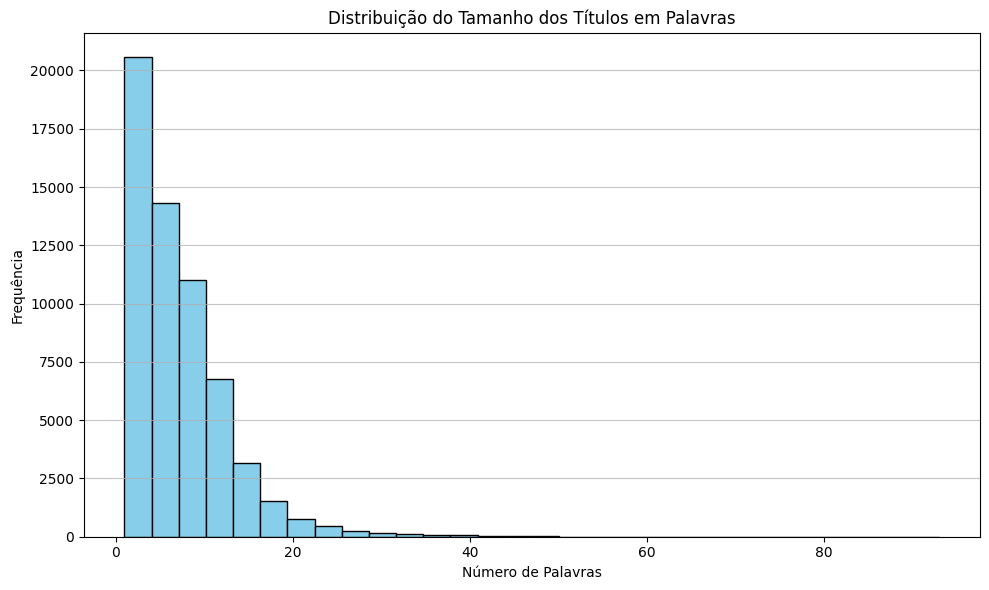

In [60]:
df_new['word_count'] = df_new['clean_title'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
plt.hist(df_new['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Tamanho dos Títulos em Palavras')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Correlações

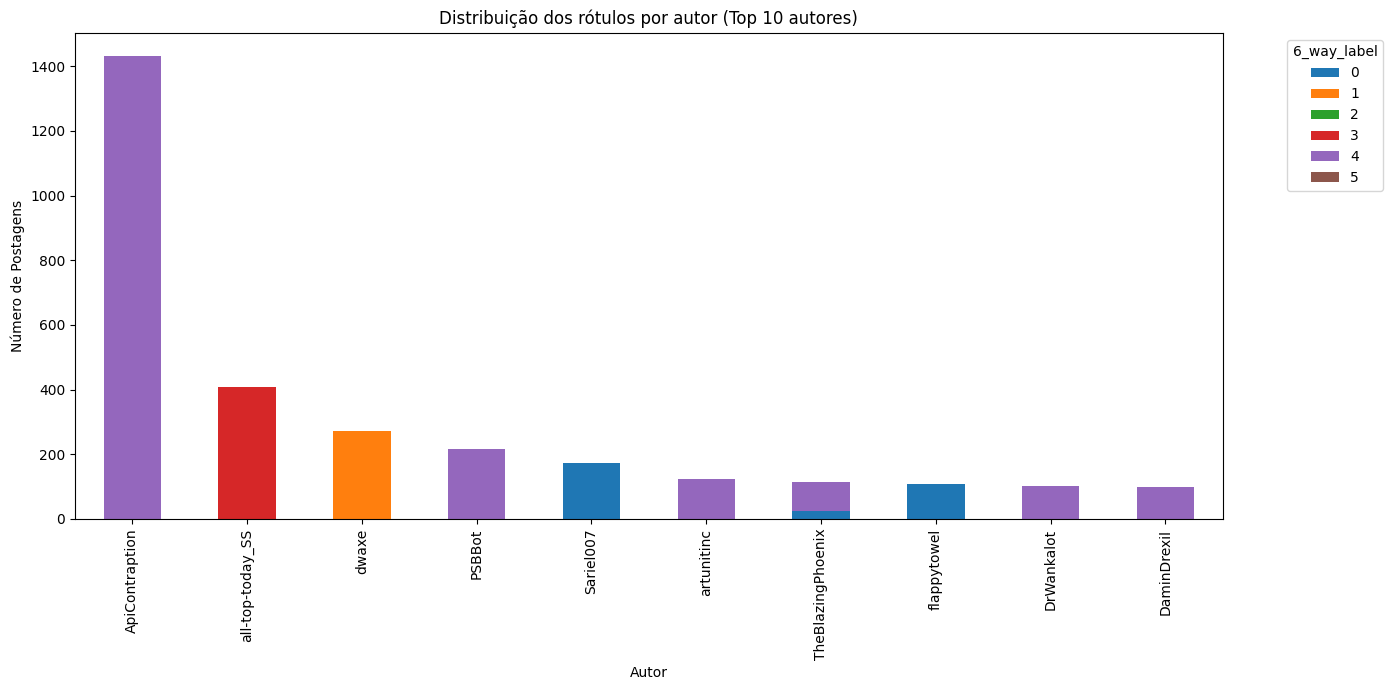

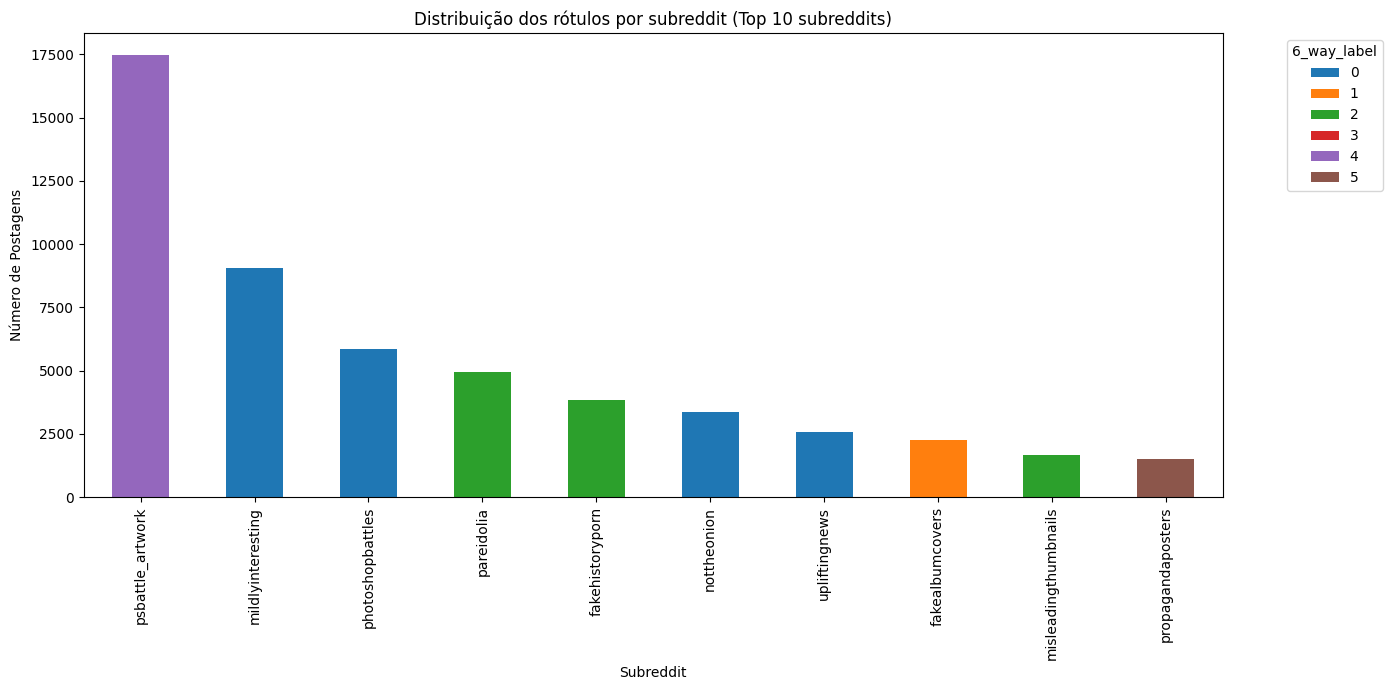

In [61]:
author_label_correlation = df_new.groupby(['author', '6_way_label']).size().unstack(fill_value=0)
top_authors = author_label_correlation.sum(axis=1).sort_values(ascending=False).head(10)
author_label_correlation.loc[top_authors.index].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribuição dos rótulos por autor (Top 10 autores)')
plt.xlabel('Autor')
plt.ylabel('Número de Postagens')
plt.legend(title='6_way_label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

subreddit_label_correlation = df_new.groupby(['subreddit', '6_way_label']).size().unstack(fill_value=0)
top_subreddits = subreddit_label_correlation.sum(axis=1).sort_values(ascending=False).head(10)
subreddit_label_correlation.loc[top_subreddits.index].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribuição dos rótulos por subreddit (Top 10 subreddits)')
plt.xlabel('Subreddit')
plt.ylabel('Número de Postagens')
plt.legend(title='6_way_label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

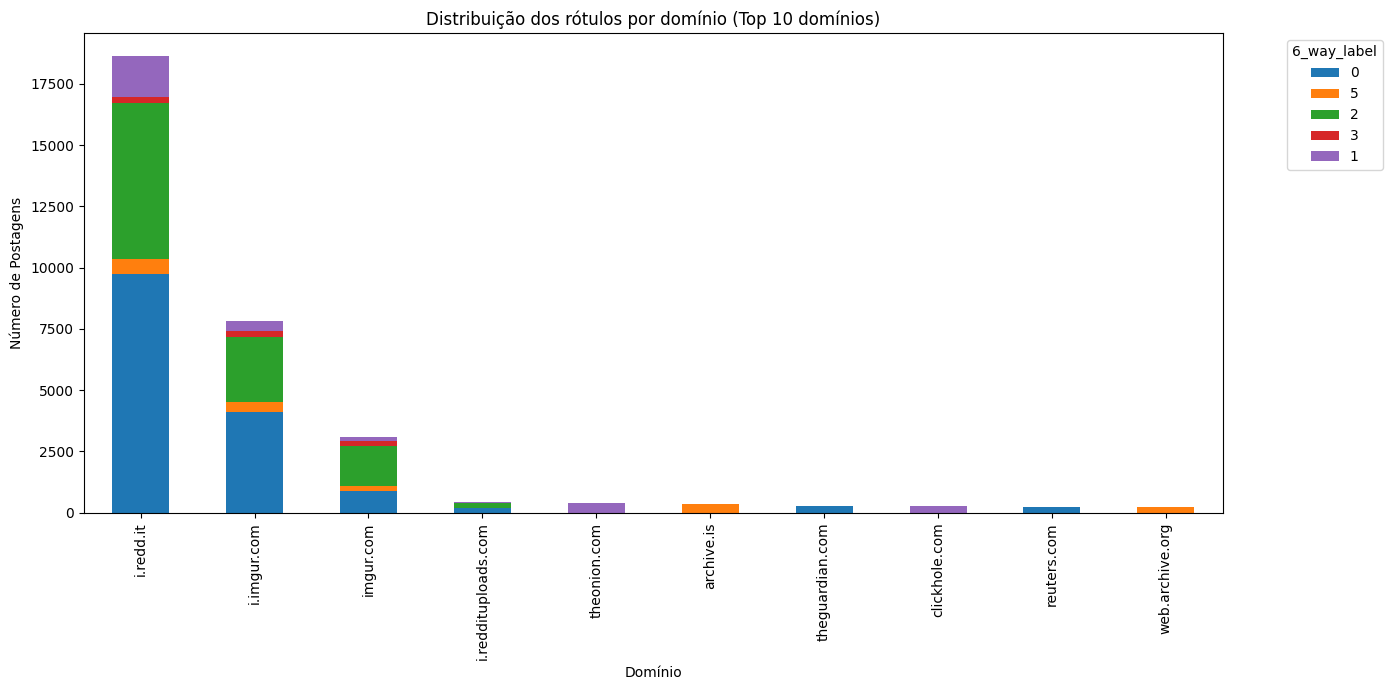

In [62]:
domain_label_correlation = df_new.groupby(['domain', '6_way_label']).size().unstack(fill_value=0)
top_domains = domain_label_correlation.sum(axis=1).sort_values(ascending=False).head(10)
domain_label_correlation.loc[top_domains.index].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribuição dos rótulos por domínio (Top 10 domínios)')
plt.xlabel('Domínio')
plt.ylabel('Número de Postagens')
plt.legend(title='6_way_label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

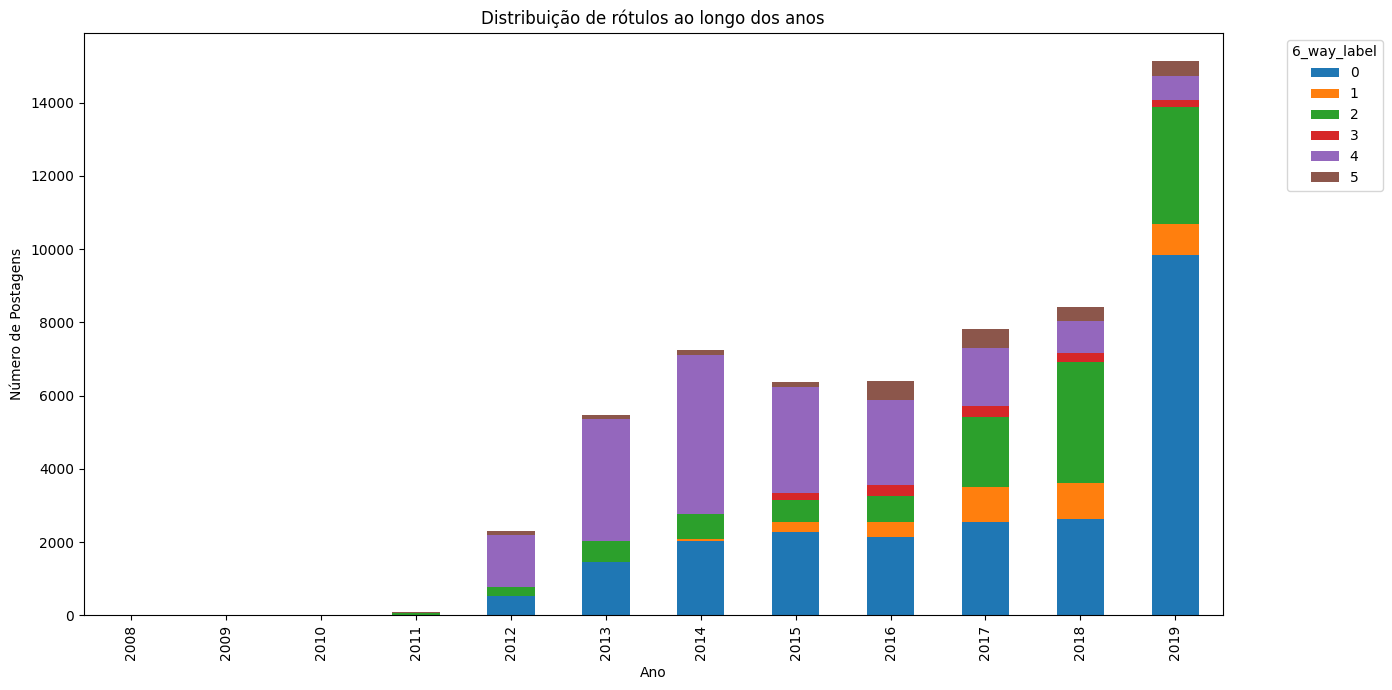

In [63]:
df_new['year'] = df_new['created_utc'].dt.year  # Extraindo o ano para análise temporal
yearly_distribution = df_new.groupby(['year', '6_way_label']).size().unstack(fill_value=0)
yearly_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribuição de rótulos ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Número de Postagens')
plt.legend(title='6_way_label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

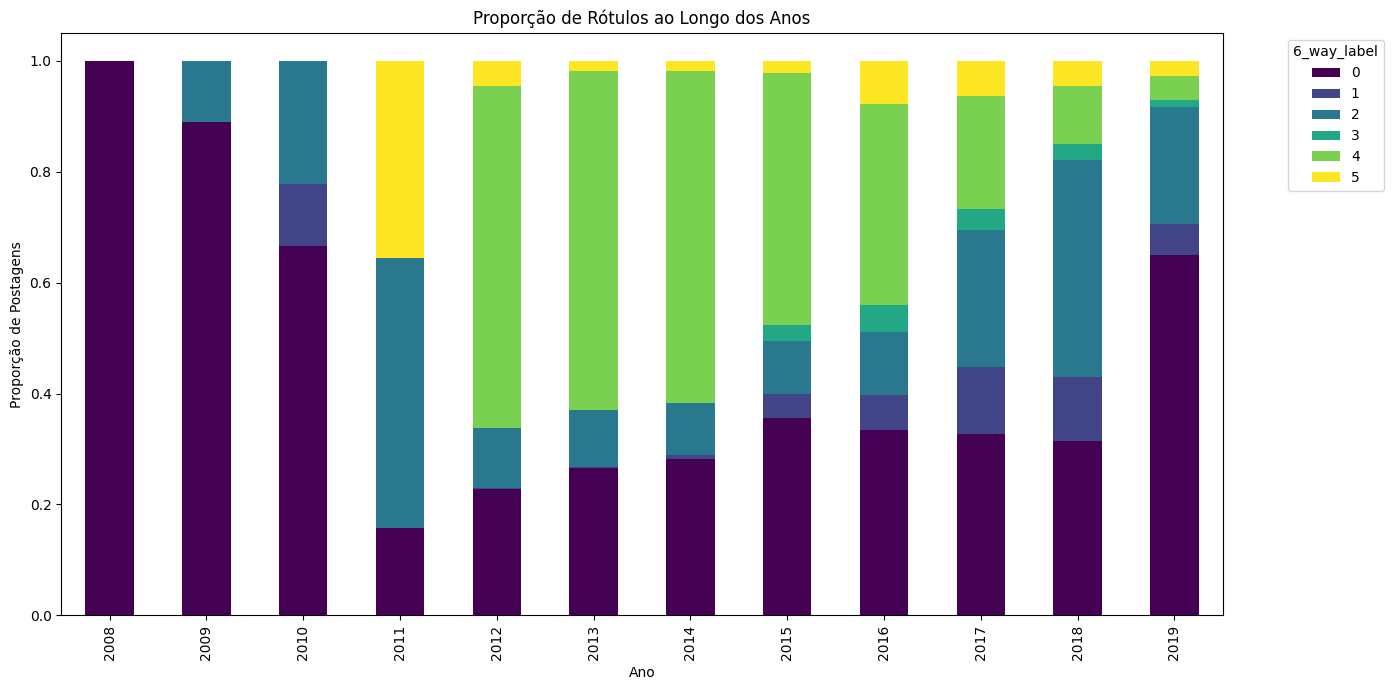

In [64]:
yearly_proportion = yearly_distribution.div(yearly_distribution.sum(axis=1), axis=0)

yearly_proportion.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Proporção de Rótulos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Proporção de Postagens')
plt.legend(title='6_way_label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

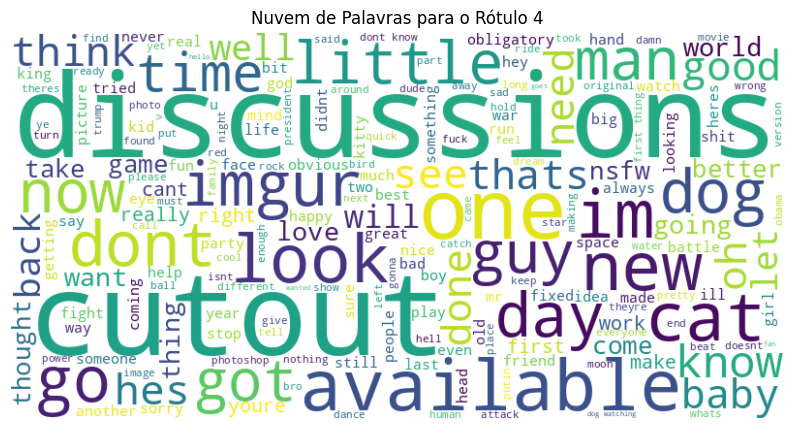

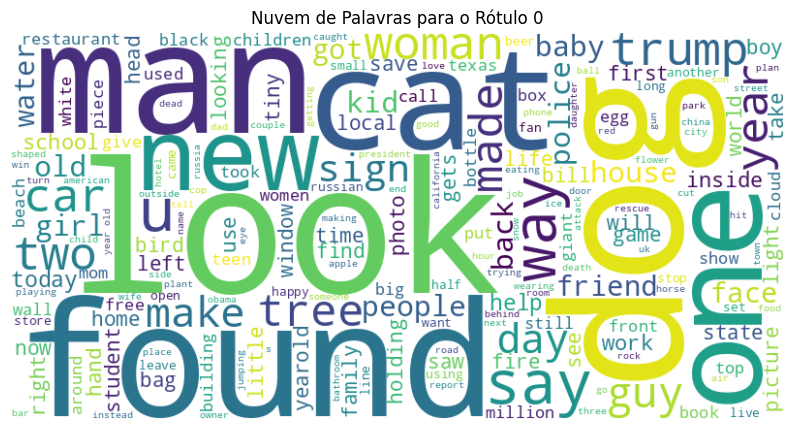

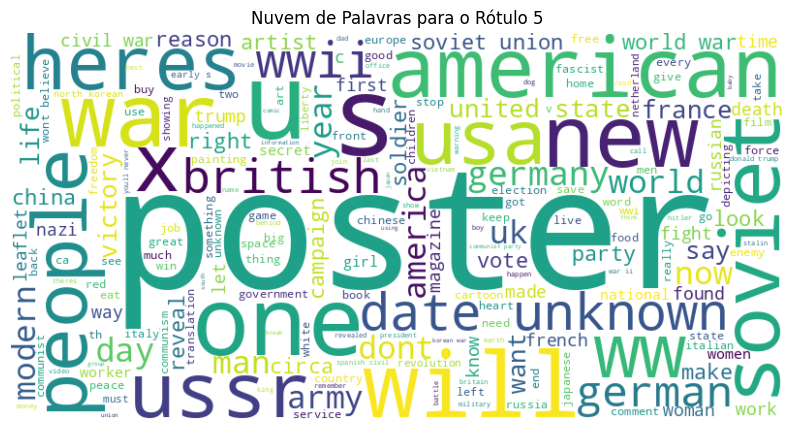

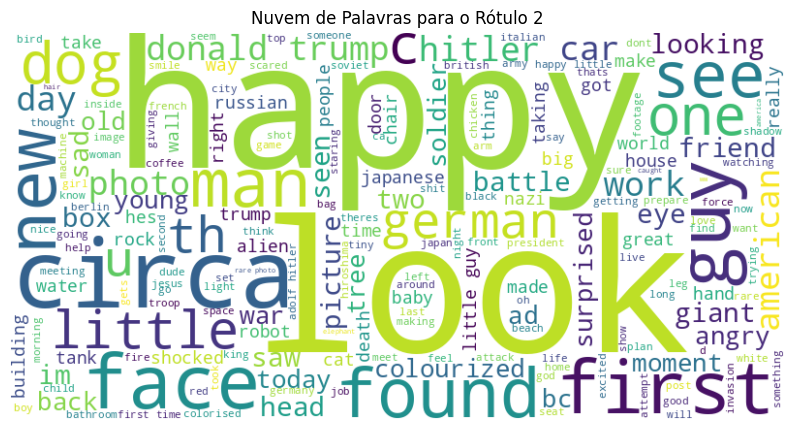

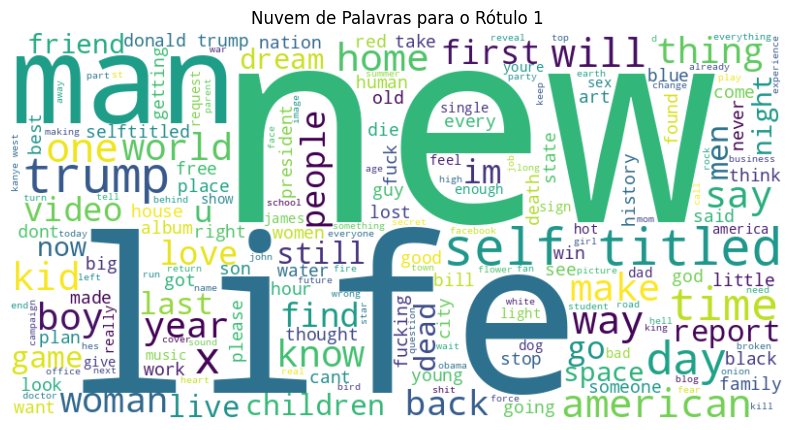

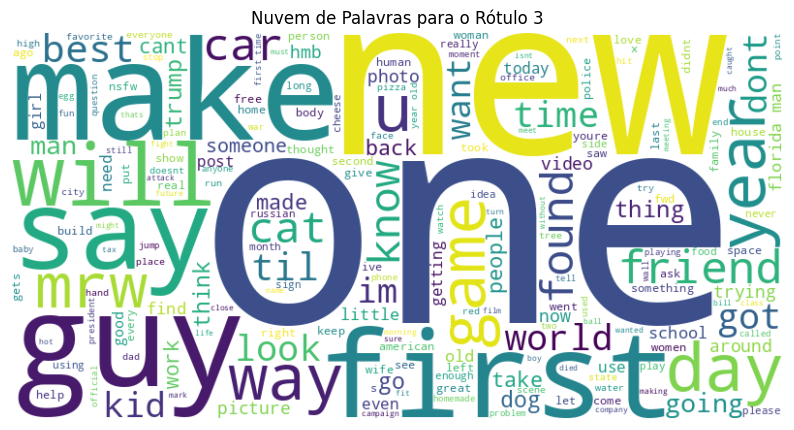

In [65]:
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(df, label_col, text_col, label_value, title):
    text_data = " ".join(df[df[label_col] == label_value][text_col].fillna("").astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in df_new['6_way_label'].unique():
    generate_wordcloud(df_new, '6_way_label', 'clean_title', label, f'Nuvem de Palavras para o Rótulo {label}')

In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df_new_sampled = df[['clean_title', '6_way_label']].dropna()
df_new_sampled = df_new.sample(frac=0.05, random_state=42)

X_ml = df_new_sampled['clean_title']
y_ml = df_new_sampled['6_way_label']

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_ml)
X_test_tfidf = vectorizer.transform(X_test_ml)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train_ml)

y_pred_svm = svm_model.predict(X_test_tfidf)
print("Métricas para o modelo SVM:")
print(classification_report(y_test_ml, y_pred_svm, zero_division=0))
print(f"Acurácia SVM: {accuracy_score(y_test_ml, y_pred_svm):.4f}")

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_tfidf, y_train_ml)

y_pred_rf = rf_model.predict(X_test_tfidf)
print("\nMétricas para o modelo Random Forest:")
print(classification_report(y_test_ml, y_pred_rf, zero_division=0))
print(f"Acurácia Random Forest: {accuracy_score(y_test_ml, y_pred_rf):.4f}")

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_ml)

y_pred_nb = nb_model.predict(X_test_tfidf)
print("\nMétricas para o modelo Naive Bayes:")
print(classification_report(y_test_ml, y_pred_nb, zero_division=0))
print(f"Acurácia Naive Bayes: {accuracy_score(y_test_ml, y_pred_nb):.4f}")

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train_tfidf, y_train_ml)

y_pred_gb = gb_model.predict(X_test_tfidf)
print("\nMétricas para o modelo Gradient Boosting:")
print(classification_report(y_test_ml, y_pred_gb, zero_division=0))
print(f"Acurácia Gradient Boosting: {accuracy_score(y_test_ml, y_pred_gb):.4f}")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train_ml)

y_pred_knn = knn_model.predict(X_test_tfidf)
print("\nMétricas para o modelo K-Neighbors:")
print(classification_report(y_test_ml, y_pred_knn, zero_division=0))
print(f"Acurácia K-Neighbors: {accuracy_score(y_test_ml, y_pred_knn):.4f}")

Métricas para o modelo SVM:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       232
           1       1.00      0.06      0.11        33
           2       0.52      0.11      0.19       106
           3       0.00      0.00      0.00        10
           4       0.68      0.59      0.63       188
           5       1.00      0.04      0.08        25

    accuracy                           0.58       594
   macro avg       0.62      0.29      0.28       594
weighted avg       0.62      0.58      0.51       594

Acurácia SVM: 0.5791

Métricas para o modelo Random Forest:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       232
           1       1.00      0.09      0.17        33
           2       0.57      0.16      0.25       106
           3       0.00      0.00      0.00        10
           4       0.55      0.79      0.65       188
           5       0.00      0.00      0.00 

In [67]:
accuracies = [
    accuracy_score(y_test_ml, y_pred_svm),
    accuracy_score(y_test_ml, y_pred_rf),
    accuracy_score(y_test_ml, y_pred_nb),
    accuracy_score(y_test_ml, y_pred_gb),
    accuracy_score(y_test_ml, y_pred_knn)
]

model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'K-Neighbors']

'''
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos de Aprendizagem de Máquina')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

results_accuracies_table = pd.DataFrame({
    'Modelo': model_names,
    'Acurácia': accuracies
})

display(results_accuracies_table)

,Modelo,Acurácia
0,SVM,0.579125
1,Random Forest,0.570707
2,Naive Bayes,0.506734
3,Gradient Boosting,0.562290
4,K-Neighbors,0.309764


## Implementação do Modelo BERT Padrão

O modelo BERT ("Bidirectional Encoder Representations from Transformers") foi utilizado para extrair características textuais a partir dos títulos limpos (`clean_title`) do conjunto de dados. Baseado na arquitetura Transformer, o BERT captura o contexto de uma palavra considerando as palavras que a antecedem e as que a seguem.

O processo de implementação seguiu as seguintes etapas:

1. **Tokenização**: Cada texto foi transformado em uma sequência de tokens utilizando o tokenizador do BERT, convertendo o texto em unidades compreensíveis pelo modelo.
2. **Extração de Características**: As sequências de tokens foram passadas pelo modelo BERT, e a última camada oculta foi utilizada para representar o texto como um vetor de características, capturando a essência semântica.
3. **Pooling**: A média dos vetores da última camada foi calculada para obter uma única representação para cada texto.
4. **Resultado Final**: Os vetores extraídos foram utilizados para representar as características textuais, que servem como entrada para outros modelos de aprendizagem de máquina ou redes neurais.

O BERT padrão é eficaz na captura do contexto do texto, tornando-o uma escolha adequada para tarefas que exigem compreensão semântica, como a detecção de fake news.

In [68]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, BertModel

In [69]:
df_sampled = df_new.sample(frac=0.05, random_state=42)

df_sampled['clean_title'] = df_sampled['clean_title'].fillna('')

X = df_sampled['clean_title'].tolist()
y = df_sampled['6_way_label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

bert_model = BertModel.from_pretrained('bert-base-uncased')

In [71]:
def extract_features(texts, batch_size=16):
    bert_model.eval() 
    features_list = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        
        encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
        
        with torch.no_grad():
            outputs = bert_model(**encodings)

        last_hidden_state = outputs.last_hidden_state
        
        mean_embeddings = last_hidden_state.mean(dim=1)
        
        features_list.append(mean_embeddings)

    return torch.cat(features_list, dim=0)

train_features = extract_features(X_train)
test_features = extract_features(X_test)

In [72]:
import numpy as np

train_features_np = train_features.numpy()
test_features_np = test_features.numpy()

np.save('train_features_text.npy', train_features_np)
np.save('train_labels.npy', np.array(y_train))
np.save('test_features_text.npy', test_features_np)
np.save('test_labels.npy', np.array(y_test))

In [73]:
# Apenas para visualização
print("Primeiras 5 amostras de vetores de características de treino:")
for i in range(5):
    print(f"Amostra {i+1}: {train_features_np[i]}")

print("\nPrimeiras 5 labels de treino correspondentes:")
print(np.array(y_train)[:5])

print("\nPrimeiras 5 amostras de vetores de características de teste:")
for i in range(5):
    print(f"Amostra {i+1}: {test_features_np[i]}")

print("\nPrimeiras 5 labels de teste correspondentes:")
print(np.array(y_test)[:5])

Primeiras 5 amostras de vetores de características de treino:
Amostra 1: [ 1.75751865e-01  1.57326087e-02  9.51247215e-02  2.45466754e-01
  3.50027531e-02 -7.71894902e-02  1.93585590e-01  3.74703914e-01
  9.51295719e-02 -4.40225042e-02 -6.55980036e-03  3.62972558e-01
 -5.89920841e-02  1.87474519e-01 -2.58035176e-02 -1.24429040e-01
 -7.63104334e-02  2.23837107e-01  1.13363177e-01 -2.05156039e-02
  1.19678872e-02 -3.05864573e-01 -7.11502433e-02 -1.39788955e-01
  7.39508308e-03  2.43912607e-01 -8.81982371e-02  3.53538943e-03
 -2.96271563e-01 -8.52715001e-02 -8.93222243e-02 -3.06616873e-01
  2.58823216e-01  1.96058020e-01 -9.00629014e-02 -4.54663187e-01
 -3.94766092e-01  4.86156829e-02 -1.30434230e-01  7.13575184e-02
 -3.69025432e-02 -1.18334524e-01  3.19223344e-01 -8.53891894e-02
 -1.95701420e-02 -2.29518507e-02 -5.11249080e-02  4.59812433e-01
 -3.70265365e-01 -4.44344103e-01 -1.99824423e-01  3.13853353e-01
 -1.04346678e-01  3.13066870e-01 -1.09033138e-01  2.98384577e-02
  3.87719780e-01 

O output representa vetores de características extraídos pelo modelo BERT para o texto da coluna `clean_title`.

### Interpretação do Output:
- Cada amostra é um vetor numérico que representa o texto em um espaço dimensional aprendido pelo BERT.
- Os valores indicam como o modelo BERT compreende o significado e as relações no texto. Cada valor corresponde a uma dimensão específica do embedding.

### Uso dos Vetores:
As características extraídas `train_features_np` e `test_features_np` agora representam vetores de embeddings textuais que podem ser utilizados como entrada em qualquer modelo de rede neural adicional ou combinados com características visuais.

Para isso, basta concatenar os vetores resultantes antes de alimentar o modelo final de detecção de fake news, no caso, o modelo multimodal que inclui a extração de características visuais de imagens.

## Implementação do Modelo RoBERTa Pré-Treinado em Fake News

O modelo RoBERTa ("A Robustly Optimized BERT Pretraining Approach") foi utilizado para a tarefa de detecção de fake news, aproveitando um modelo pré-treinado específico para esse domínio (`jy46604790/Fake-News-Bert-Detect`). A variante RoBERTa é uma versão otimizada do BERT, treinada com maior quantidade de dados e por mais tempo, sendo capaz de capturar padrões típicos de fake news.

O processo de implementação foi conduzido conforme os seguintes passos:

1. **Tokenização**: Os títulos limpos (`clean_title`) foram transformados em sequências de tokens usando o tokenizador de RoBERTa, ajustado para capturar nuances associadas a notícias falsas.
2. **Extração de Características**: As sequências de tokens foram passadas pelo modelo RoBERTa, e a última camada oculta foi extraída para representar o texto como um vetor de características.
3. **Pooling**: A média dos vetores da última camada foi calculada para gerar uma única representação vetorial para cada título.
4. **Resultado Final**: As características extraídas encapsulam o conhecimento do modelo sobre fake news e servem como representação densa dos textos para análises subsequentes.

A utilização do RoBERTa pré-treinado em fake news permite capturar sinais e padrões característicos desse tipo de conteúdo, tornando-o uma ferramenta eficaz para a tarefa de detecção.

In [74]:
from transformers import AutoTokenizer, AutoModel

MODEL = "jy46604790/Fake-News-Bert-Detect"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
fake_bert_model = AutoModel.from_pretrained(MODEL)

df_sampled = df_new.sample(frac=0.05, random_state=42)

df_sampled['clean_title'] = df_sampled['clean_title'].fillna('')

X = df_sampled['clean_title'].tolist()
y = df_sampled['6_way_label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def extract_features_with_fakebert(texts, batch_size=5):
    fake_bert_model.eval() 
    features_list = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

        with torch.no_grad():
            outputs = fake_bert_model(**encodings)

        last_hidden_state = outputs.last_hidden_state 

        mean_embeddings = last_hidden_state.mean(dim=1)

        features_list.append(mean_embeddings)

    return torch.cat(features_list, dim=0)

X_test_sample = X_test[:5]
y_test_sample = y_test[:5]

test_features = extract_features_with_fakebert(X_test_sample)

test_features_np = test_features.numpy()

print("Primeiras 5 amostras de vetores de características de teste:")
for i, (features, label) in enumerate(zip(test_features_np, y_test_sample)):
    print(f"Amostra {i + 1} - Rótulo: {label}\nVetores: {features}\n")

/home/thaisrozasteixeira/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at jy46604790/Fake-News-Bert-Detect and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Primeiras 5 amostras de vetores de características de teste:
Amostra 1 - Rótulo: 2
Vetores: [ 3.14253308e-02 -1.14135981e+00 -1.94512025e-01 -9.89938080e-01
  1.19692338e+00 -8.00276518e-01 -1.70817167e-01 -7.80104399e-01
  1.86565351e+00  4.37540829e-01 -9.05519187e-01  7.07326978e-02
  3.56970638e-01  1.92307937e+00  6.40281558e-01  1.27429509e+00
 -2.73505956e-01  3.20436984e-01  4.23963517e-02  3.31971377e-01
  4.57173824e-01  1.71197522e+00 -6.26850665e-01  8.30214977e-01
  1.15406120e+00 -7.25771189e-01  3.33824366e-01 -1.22237839e-01
 -3.10381711e-01  3.58831584e-02 -4.20052737e-01  2.77053982e-01
  3.15926462e-01  6.24909163e-01  1.13606147e-01  6.05052769e-01
 -1.06660336e-01 -9.20737386e-01 -1.91386878e-01  4.66556221e-01
  5.67188740e-01 -1.01177359e+00 -3.51954430e-01  3.39757621e-01
  6.71698451e-01  1.06967604e+00 -2.44798586e-01  2.20146447e-01
  3.23331505e-01 -1.98217332e-01  1.65897608e-01 -1.12183237e+00
 -5.26867449e-01 -4.08545256e-01  1.31326526e-01 -3.24842155e-0

## Implementação do Modelo BERT Pré-Treinado em Fake News

Nesta implementação, foi utilizado o modelo BERT (`bert-base-cased`), que foi treinado especificamente em um conjunto de dados de fake news (`elozano/bert-base-cased-fake-news`). O objetivo foi extrair características textuais a partir dos títulos limpos (`clean_title`) do conjunto de dados, visando identificar padrões associados a notícias falsas.

O processo de implementação seguiu as seguintes etapas:

1. **Carregamento do Modelo e Tokenizador**: O modelo BERT pré-treinado em fake news e seu tokenizador foram carregados a partir do repositório do Hugging Face. Este modelo foi ajustado para capturar nuances específicas presentes em textos de notícias falsas.

2. **Tokenização**: Cada texto foi transformado em uma sequência de tokens utilizando o tokenizador do modelo. A tokenização converte o texto em unidades compreensíveis para o modelo BERT, incluindo truncamento para um tamanho máximo de 128 tokens por amostra.

3. **Extração de Características**: As sequências de tokens foram passadas pelo modelo BERT, e a última camada oculta do modelo foi utilizada para representar o texto como um vetor de características. Estes vetores refletem a essência semântica do texto, incorporando o conhecimento adquirido pelo modelo durante o pré-treinamento em fake news.

4. **Pooling**: A média dos vetores da última camada oculta foi calculada para obter uma única representação vetorial para cada título. Esse vetor serve como uma representação compacta das características do texto.

5. **Resultado Final**: As características extraídas para as 5 primeiras amostras do conjunto de teste foram apresentadas, mostrando os vetores gerados e os rótulos correspondentes. Esses vetores serão utilizados como entrada em modelos de aprendizagem de máquina adicionais para a tarefa de detecção de fake news.

Essa abordagem aproveita o fato de que o modelo BERT foi treinado em um conjunto de dados de fake news, o que aumenta a capacidade de capturar sinais e padrões característicos desse tipo de conteúdo.

In [75]:
MODEL = "elozano/bert-base-cased-fake-news"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
fake_bert_model = AutoModel.from_pretrained(MODEL)

df_sampled = df_new.sample(frac=0.05, random_state=42)

df_sampled['clean_title'] = df_sampled['clean_title'].fillna('')

X = df_sampled['clean_title'].tolist()
y = df_sampled['6_way_label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def extract_features_with_fakebert(texts, batch_size=5):
    fake_bert_model.eval()
    features_list = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

        with torch.no_grad():
            outputs = fake_bert_model(**encodings)

        last_hidden_state = outputs.last_hidden_state 
        
        mean_embeddings = last_hidden_state.mean(dim=1) 
        
        features_list.append(mean_embeddings)

    return torch.cat(features_list, dim=0)

X_test_sample = X_test[:5]
y_test_sample = y_test[:5]

test_features = extract_features_with_fakebert(X_test_sample)

test_features_np = test_features.numpy()

print("Primeiras 5 amostras de vetores de características de teste:")
for i, (features, label) in enumerate(zip(test_features_np, y_test_sample)):
    print(f"Amostra {i + 1} - Rótulo: {label}\nVetores: {features}\n")

Primeiras 5 amostras de vetores de características de teste:
Amostra 1 - Rótulo: 2
Vetores: [ 2.42469698e-01  3.37721765e-01  5.17557621e-01  6.40648544e-01
  2.85736531e-01 -6.63034379e-01 -3.81199360e-01  2.25081250e-01
 -1.78981215e-01 -2.04976201e-01 -5.26398718e-01  1.59232855e-01
 -1.32494614e-01  4.99572754e-01  8.86066973e-01  1.01194263e+00
 -3.47728491e-01  2.00466633e-01 -1.12207584e-01 -3.92379493e-01
  3.65035146e-01  9.72094983e-02 -2.14101881e-01 -2.18145385e-01
 -5.67583553e-03  2.45795310e-01 -4.16679770e-01 -1.78035293e-02
  4.24514599e-02  3.79785120e-01  1.63452446e-01 -6.46336019e-01
  8.89696419e-01  3.10539633e-01  7.02308953e-01 -3.71732609e-03
 -2.15564683e-01  1.28359541e-01  4.87125158e-01 -1.70676693e-01
  6.85787797e-02 -1.86368436e-01  4.29660827e-03 -4.24362421e-02
  4.73091304e-01 -2.73443848e-01  5.08523941e-01 -6.56880438e-01
 -1.70822278e-01 -5.40396333e-01  8.69016424e-02 -8.01099837e-01
 -4.47273731e-01  5.69674373e-01  6.29184902e-01 -2.84867525e-0

In [76]:
# Definindo o modelo pré-treinado XLNet
MODEL = "xlnet-base-cased"

# Carregando o tokenizer e o modelo XLNet pré-treinado
tokenizer = AutoTokenizer.from_pretrained(MODEL)
xlnet_model = AutoModel.from_pretrained(MODEL)

# Usando apenas 5% do dataset original para a implementação
df_sampled = df_new.sample(frac=0.05, random_state=42)

# Preenchendo valores ausentes na coluna 'clean_title' e convertendo para listas
df_sampled['clean_title'] = df_sampled['clean_title'].fillna('')

X = df_sampled['clean_title'].tolist()
y = df_sampled['6_way_label'].tolist()

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para extrair características com XLNet
def extract_features_with_xlnet(texts, batch_size=5):
    xlnet_model.eval()  # Definir o modelo em modo de avaliação
    features_list = []

    # Processamento em lotes
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        
        # Tokenização
        encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
        
        # Desativar o cálculo do gradiente para economizar memória
        with torch.no_grad():
            outputs = xlnet_model(**encodings)

        # Extraindo a última camada oculta como as características
        last_hidden_state = outputs.last_hidden_state  # Shape: (batch_size, seq_length, hidden_size)
        
        # Usando a média das características da sequência para cada entrada (pooling)
        mean_embeddings = last_hidden_state.mean(dim=1)  # Shape: (batch_size, hidden_size)
        
        # Armazenando as características
        features_list.append(mean_embeddings)

    # Concatenando todos os lotes em uma matriz final
    return torch.cat(features_list, dim=0)

# Extraindo características para as 5 primeiras amostras do conjunto de teste
X_test_sample = X_test[:5]
y_test_sample = y_test[:5]

test_features = extract_features_with_xlnet(X_test_sample)

# Convertendo para array numpy para facilitar a visualização
test_features_np = test_features.numpy()

# Mostrando os vetores extraídos para as 5 primeiras amostras de teste e seus rótulos
print("Primeiras 5 amostras de vetores de características de teste com XLNet:")
for i, (features, label) in enumerate(zip(test_features_np, y_test_sample)):
    print(f"Amostra {i + 1} - Rótulo: {label}\nVetores: {features}\n")

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Primeiras 5 amostras de vetores de características de teste com XLNet:
Amostra 1 - Rótulo: 2
Vetores: [ 5.36536694e-01  1.27243936e+00 -1.71958780e+00  9.77935076e-01
 -5.09763181e-01 -4.02805662e+00  4.99228060e-01 -4.55794692e-01
 -1.46041691e+00 -6.87837958e-01 -1.07632647e-03  1.37197208e+00
  3.78357470e-02  2.55964565e+00 -3.41117680e-01  1.41703820e+00
  1.67312491e+00  1.32318664e+00 -3.83123487e-01 -5.89324772e-01
 -9.20350134e-01 -4.14152592e-02 -1.61031401e+00 -3.55948496e+00
 -4.69625115e-01  9.63957667e-01  6.29055277e-02  5.15900105e-02
  2.25939583e-02 -5.46373725e-01 -5.81506133e-01 -4.99996245e-01
 -1.45947266e+00 -2.57312989e+00  5.19807458e-01  2.68450713e+00
  1.40564096e+00  1.28458238e+00  1.37676752e+00  1.75392771e+00
  7.29463696e-01  1.93221033e+00 -2.02113464e-01 -1.02699645e-01
  3.19014698e-01  1.27022266e+00  9.07234550e-01 -1.49425030e-01
 -1.80601525e+00  8.61568987e-01  2.34059596e+00 -1.18504357e+00
  1.02783509e-01  1.33343816e+00 -3.53559822e-01  5.0